In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
print(tf.__version__)

2.8.0


In [ ]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [ ]:
# data is a dict type 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# data has 30 different feat col and contains 569 different instances 
print(f"data shape : {data['data'].shape}")
# data is np array type 
type(data["data"])

data shape : (569, 30)


numpy.ndarray

In [ ]:
# target is a 1d vector with similar Rows as data 
print(data["target"].shape)
data["target"][:50]

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data["data"], data["target"], 
                                                    test_size=0.25)

N, D = x_train.shape

In [ ]:
# scaling data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# we use training data to get scaling properties to use in all new data later
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
###### building the tf dense model
model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(D,)),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 60)


print("Train score: ", model.evaluate(x_train, y_train))
print("Test score: ", model.evaluate(x_test, y_test))

Epoch 1/60
14/14 [==============================] - 1s 24ms/step - loss: 0.5821 - accuracy: 0.7042 - val_loss: 0.5534 - val_accuracy: 0.7133
Epoch 2/60
14/14 [==============================] - 0s 10ms/step - loss: 0.5218 - accuracy: 0.7535 - val_loss: 0.5019 - val_accuracy: 0.7552
Epoch 3/60
14/14 [==============================] - 0s 10ms/step - loss: 0.4720 - accuracy: 0.7958 - val_loss: 0.4610 - val_accuracy: 0.7902
Epoch 4/60
14/14 [==============================] - 0s 10ms/step - loss: 0.4316 - accuracy: 0.8310 - val_loss: 0.4276 - val_accuracy: 0.8112
Epoch 5/60
14/14 [==============================] - 0s 12ms/step - loss: 0.3977 - accuracy: 0.8568 - val_loss: 0.4007 - val_accuracy: 0.8322
Epoch 6/60
14/14 [==============================] - 0s 8ms/step - loss: 0.3699 - accuracy: 0.8756 - val_loss: 0.3787 - val_accuracy: 0.8531
Epoch 7/60
14/14 [==============================] - 0s 10ms/step - loss: 0.3465 - accuracy: 0.8850 - val_loss: 0.3589 - val_accuracy: 0.8811
Epoch 8/60
14/

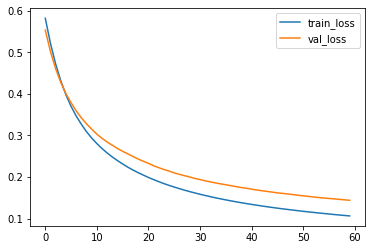

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

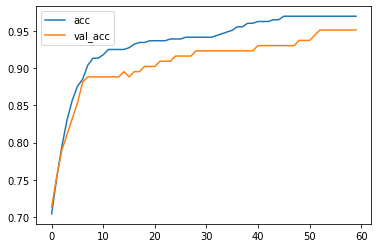

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# make prediction 
pred = model.predict(x_test)
pred[:5]

array([[0.97582054],
       [0.9906116 ],
       [0.60333073],
       [0.9970842 ],
       [0.74640894]], dtype=float32)

In [ ]:
# we need to transorm and round all predicted results to 0 or 1 
import numpy as np
pred_transform = np.round(pred) 
pred_transform.shape

(143, 1)

In [ ]:
y_test.shape

(143,)

In [ ]:
# we need to flatten our pred so it has same dimension as y_test
pred_transform = pred_transform.flatten()

In [ ]:
# get the model peformance manully 
print(f"model peformance ('manually'): {np.mean(pred_transform == y_test)}")

model peformance ('manually'): 0.951048951048951


In [ ]:
# get model peformance using keras 
print(f"model peformance ('keras'): {model.evaluate(x_test, y_test)}")

5/5 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9510
model peformance ('keras'): [0.1438666582107544, 0.9510489702224731]
